# Analisis Hiperespectral cargando una Imagen 

Se cargan las librerias

In [1]:
from spectral import imshow, view_cube
import spectral
import spectral.io.envi as envi
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from pandas import Series,DataFrame
%matplotlib inline
import matplotlib.image as mpimg
import os
import cv2
import re

import pandas as pd
import PIL
from PIL import Image
import random
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D


Se carga la imagen Hiperespectral desde el directorio donde esta.   
Se debe cargar la imagen hdr y raw.

In [2]:
imghdr=envi.open('Desktop/Hyperimages2/L/hyper/032979c-20x-roi5.hdr', 
                 'Desktop/Hyperimages2/L/hyper/032979c-20x-roi5.raw')

Se convierte la imagen en matriz

In [3]:

imghdr_nparr = np.array(imghdr.load())



In [4]:
imghdr_nparr.shape

(1024, 1280, 60)

In [5]:
np.amax(imghdr_nparr)

14528.0

In [6]:
np.amin(imghdr_nparr)

1424.0

Se comprime la matriz de 1024x1280x60 en un vector de 60 puntos.   Cada punto es el promedio de "x"
y "y" y representa un promedio por frecuencia.

In [7]:
V=imghdr_nparr.mean(axis=1)


In [8]:
V.shape


(1024, 60)

In [9]:

VE=V.mean(axis=0)


In [10]:
VE.shape

(60,)

Se hacen pruebas opcionales con el vector

In [11]:
print(VE)

[1833.6228 1833.5906 1868.7598 1913.8418 1977.8479 2075.3945 2220.1987
 2409.3257 2625.7021 2845.8232 3031.0132 3185.124  3281.7485 3383.5688
 3582.7263 3885.8552 4348.4854 4903.538  5503.7837 6025.4688 6289.814
 6325.0386 6307.039  6381.421  6625.4814 6844.623  7149.024  7323.2046
 7126.1846 6621.672  6035.0703 5641.903  5300.515  5072.0127 5057.1416
 5119.0127 5295.0664 5412.084  5576.134  5415.073  4901.1025 4218.173
 3610.1448 3156.8687 2823.8276 2647.6953 2528.5474 2412.2793 2291.662
 2183.6543 2074.152  1948.8047 1842.6544 1768.3657 1725.0132 1698.3062
 1683.938  1675.4579 1666.6958 1656.7024]


In [12]:
print(VE[39])

5415.073


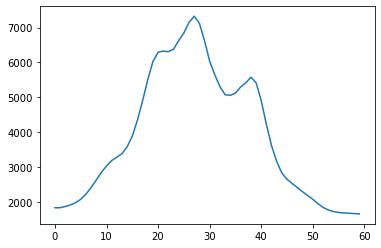

In [13]:
band_x=np.linspace(0,59)
plt.plot(VE)

Se establece parametro de prueba segun la data.   Se escoge la frecuencia 39 por su diferencia entre 
una imagen con cancer y una imagen sin cancer

In [14]:

if VE[39]>6200:
    print ('Resultado Negativo')
if VE[39]<6200:
    print ('Resultado Positivo')

Resultado Positivo
